In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cal_df = pd.read_csv('calories.csv')
exr_df = pd.read_csv('exercise.csv')

In [3]:
cal_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
exr_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df = exr_df.merge(cal_df, on='User_ID')

In [11]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
df.replace({'Gender':{'male':1, 'female':0}}, inplace=True)

In [15]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [31]:
df.shape

(15000, 9)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [16]:
df.corr()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

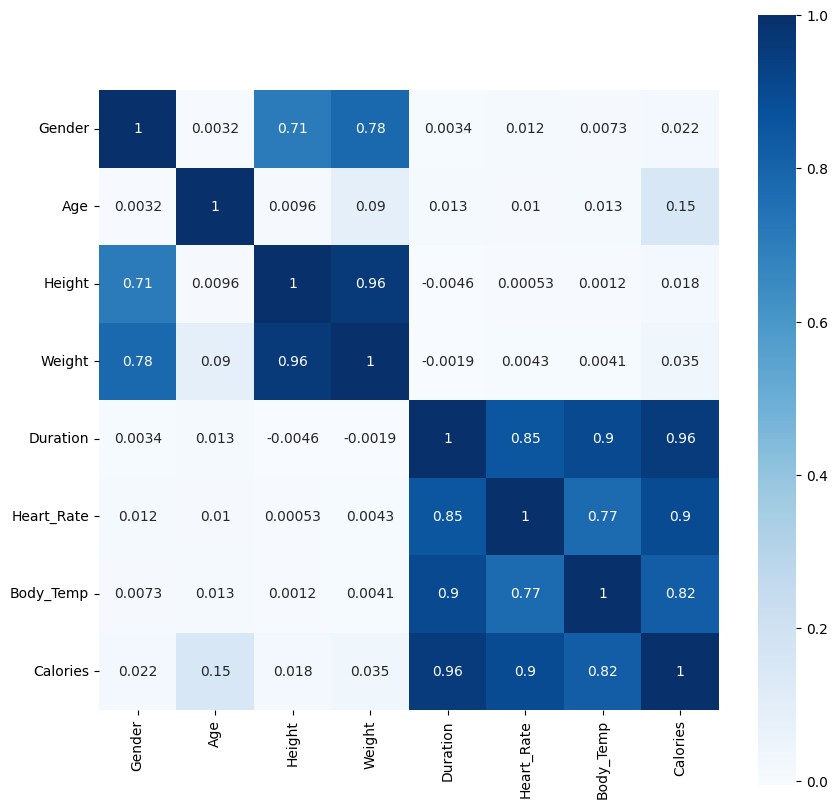

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('User_ID', axis=1).corr(), annot=True, square=True, cmap='Blues')

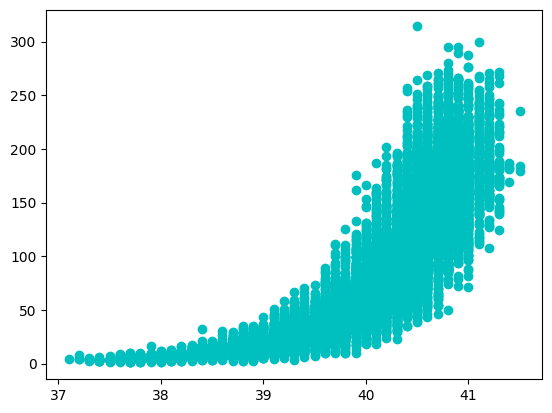

In [28]:
plt.scatter(df['Body_Temp'], df['Calories'], color='c')

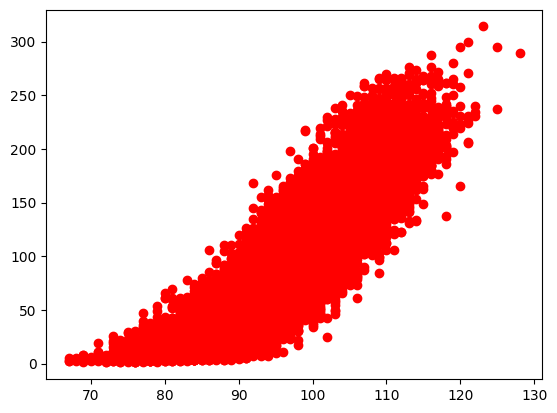

In [29]:
plt.scatter(df['Heart_Rate'], df['Calories'], color='r')

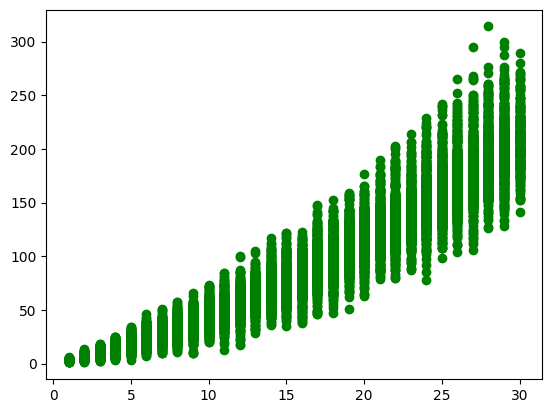

In [30]:
plt.scatter(df['Duration'], df['Calories'], color='g')

In [78]:
df_dur = np.sort(np.mean(df['Duration'].to_numpy().reshape(50,-1), axis=1))
df_hr = np.sort(np.mean(df['Heart_Rate'].to_numpy().reshape(50,-1), axis=1))
df_bt = np.sort(np.mean(df['Body_Temp'].to_numpy().reshape(50,-1), axis=1))
df_cal = np.sort(np.mean(df['Calories'].to_numpy().reshape(50,-1), axis=1))

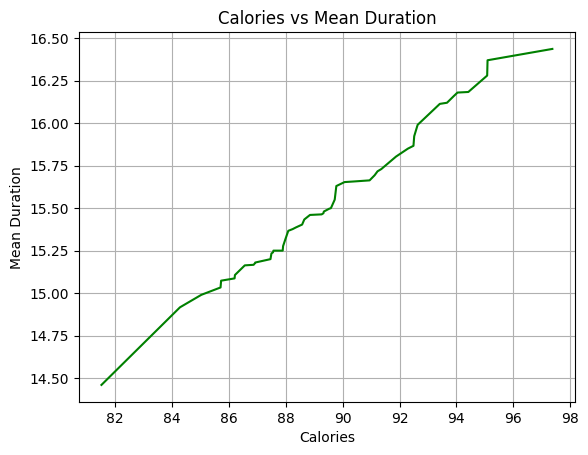

In [64]:
plt.plot(df_cal, df_dur,color='g')
against_la = 'Mean Duration'
plt.xlabel('Calories')
plt.ylabel(against_la)
plt.title(f'Calories vs {against_la}')
plt.grid(True)

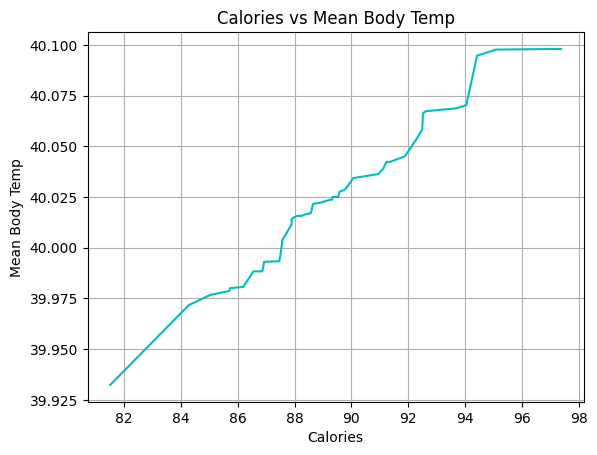

In [63]:
plt.plot(df_cal, df_bt,color='c')
against_la = 'Mean Body Temp'
plt.xlabel('Calories')
plt.ylabel(against_la)
plt.title(f'Calories vs {against_la}')
plt.grid(True)

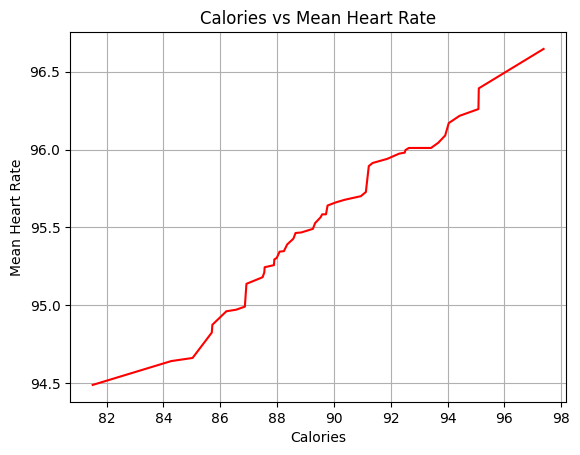

In [84]:
plt.plot(df_cal, df_hr,color='r')
against_la = 'Mean Heart Rate'
plt.xlabel('Calories')
plt.ylabel(against_la)
plt.title(f'Calories vs {against_la}')
plt.grid(True)

<Axes: xlabel='Gender', ylabel='count'>

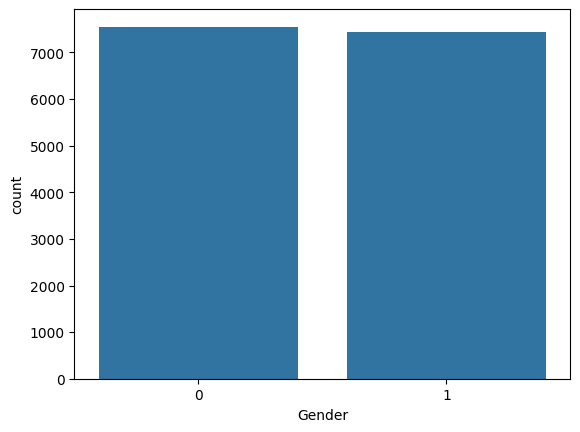

In [67]:
sns.countplot(x='Gender', data=df)

In [69]:
df.Gender.value_counts()

Gender
0    7553
1    7447
Name: count, dtype: int64

In [70]:
df['Height'] = df['Height']/100

In [72]:
df['BMI'] = df['Weight']/(df['Height']**2) 

In [83]:
df.head()

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,1,68,29.0,105.0,40.8,231.0,26.038781
1,0,20,14.0,94.0,40.3,66.0,21.773842
2,1,69,5.0,88.0,38.7,26.0,24.655910
3,0,34,13.0,100.0,40.5,71.0,22.159109
4,0,27,10.0,81.0,39.8,35.0,24.456063


In [77]:
df_bmi = np.sort(np.mean(df['BMI'].to_numpy().reshape(50,-1), axis=1))


In [82]:
df =  df.drop(['Height', 'Weight', 'User_ID'], axis=1)

In [85]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import * 

X = df.drop('Calories', axis=1)
y = df['Calories']

X, y

(       Gender  Age  Duration  Heart_Rate  Body_Temp        BMI
 0           1   68      29.0       105.0       40.8  26.038781
 1           0   20      14.0        94.0       40.3  21.773842
 2           1   69       5.0        88.0       38.7  24.655910
 3           0   34      13.0       100.0       40.5  22.159109
 4           0   27      10.0        81.0       39.8  24.456063
 ...       ...  ...       ...         ...        ...        ...
 14995       0   20      11.0        92.0       40.4  23.087868
 14996       0   27       6.0        85.0       39.2  23.875115
 14997       0   43      16.0        90.0       40.1  22.942130
 14998       1   78       2.0        84.0       38.3  26.040968
 14999       1   63      18.0        92.0       40.5  26.395803
 
 [15000 rows x 6 columns],
 0        231.0
 1         66.0
 2         26.0
 3         71.0
 4         35.0
          ...  
 14995     45.0
 14996     23.0
 14997     75.0
 14998     11.0
 14999     98.0
 Name: Calories, Length: 15

In [86]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((12000, 6), (3000, 6), (12000,), (3000,))

In [88]:
from xgboost import XGBRFRegressor

xbg = XGBRFRegressor()
pipe = make_pipeline(StandardScaler(), xbg)

pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbrfregressor',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None,
                                reg_alpha=None, ...))])

In [89]:
x_ = pipe.predict(X_train)

r2_score(y_train, x_)

0.9856855387021353

In [90]:
y_ = pipe.predict(X_test)

r2_score(y_test, y_)

0.9857162609281701

In [91]:
mean_absolute_error(y_test, y_)

5.16289246447881

## Actual vs Predicited Values

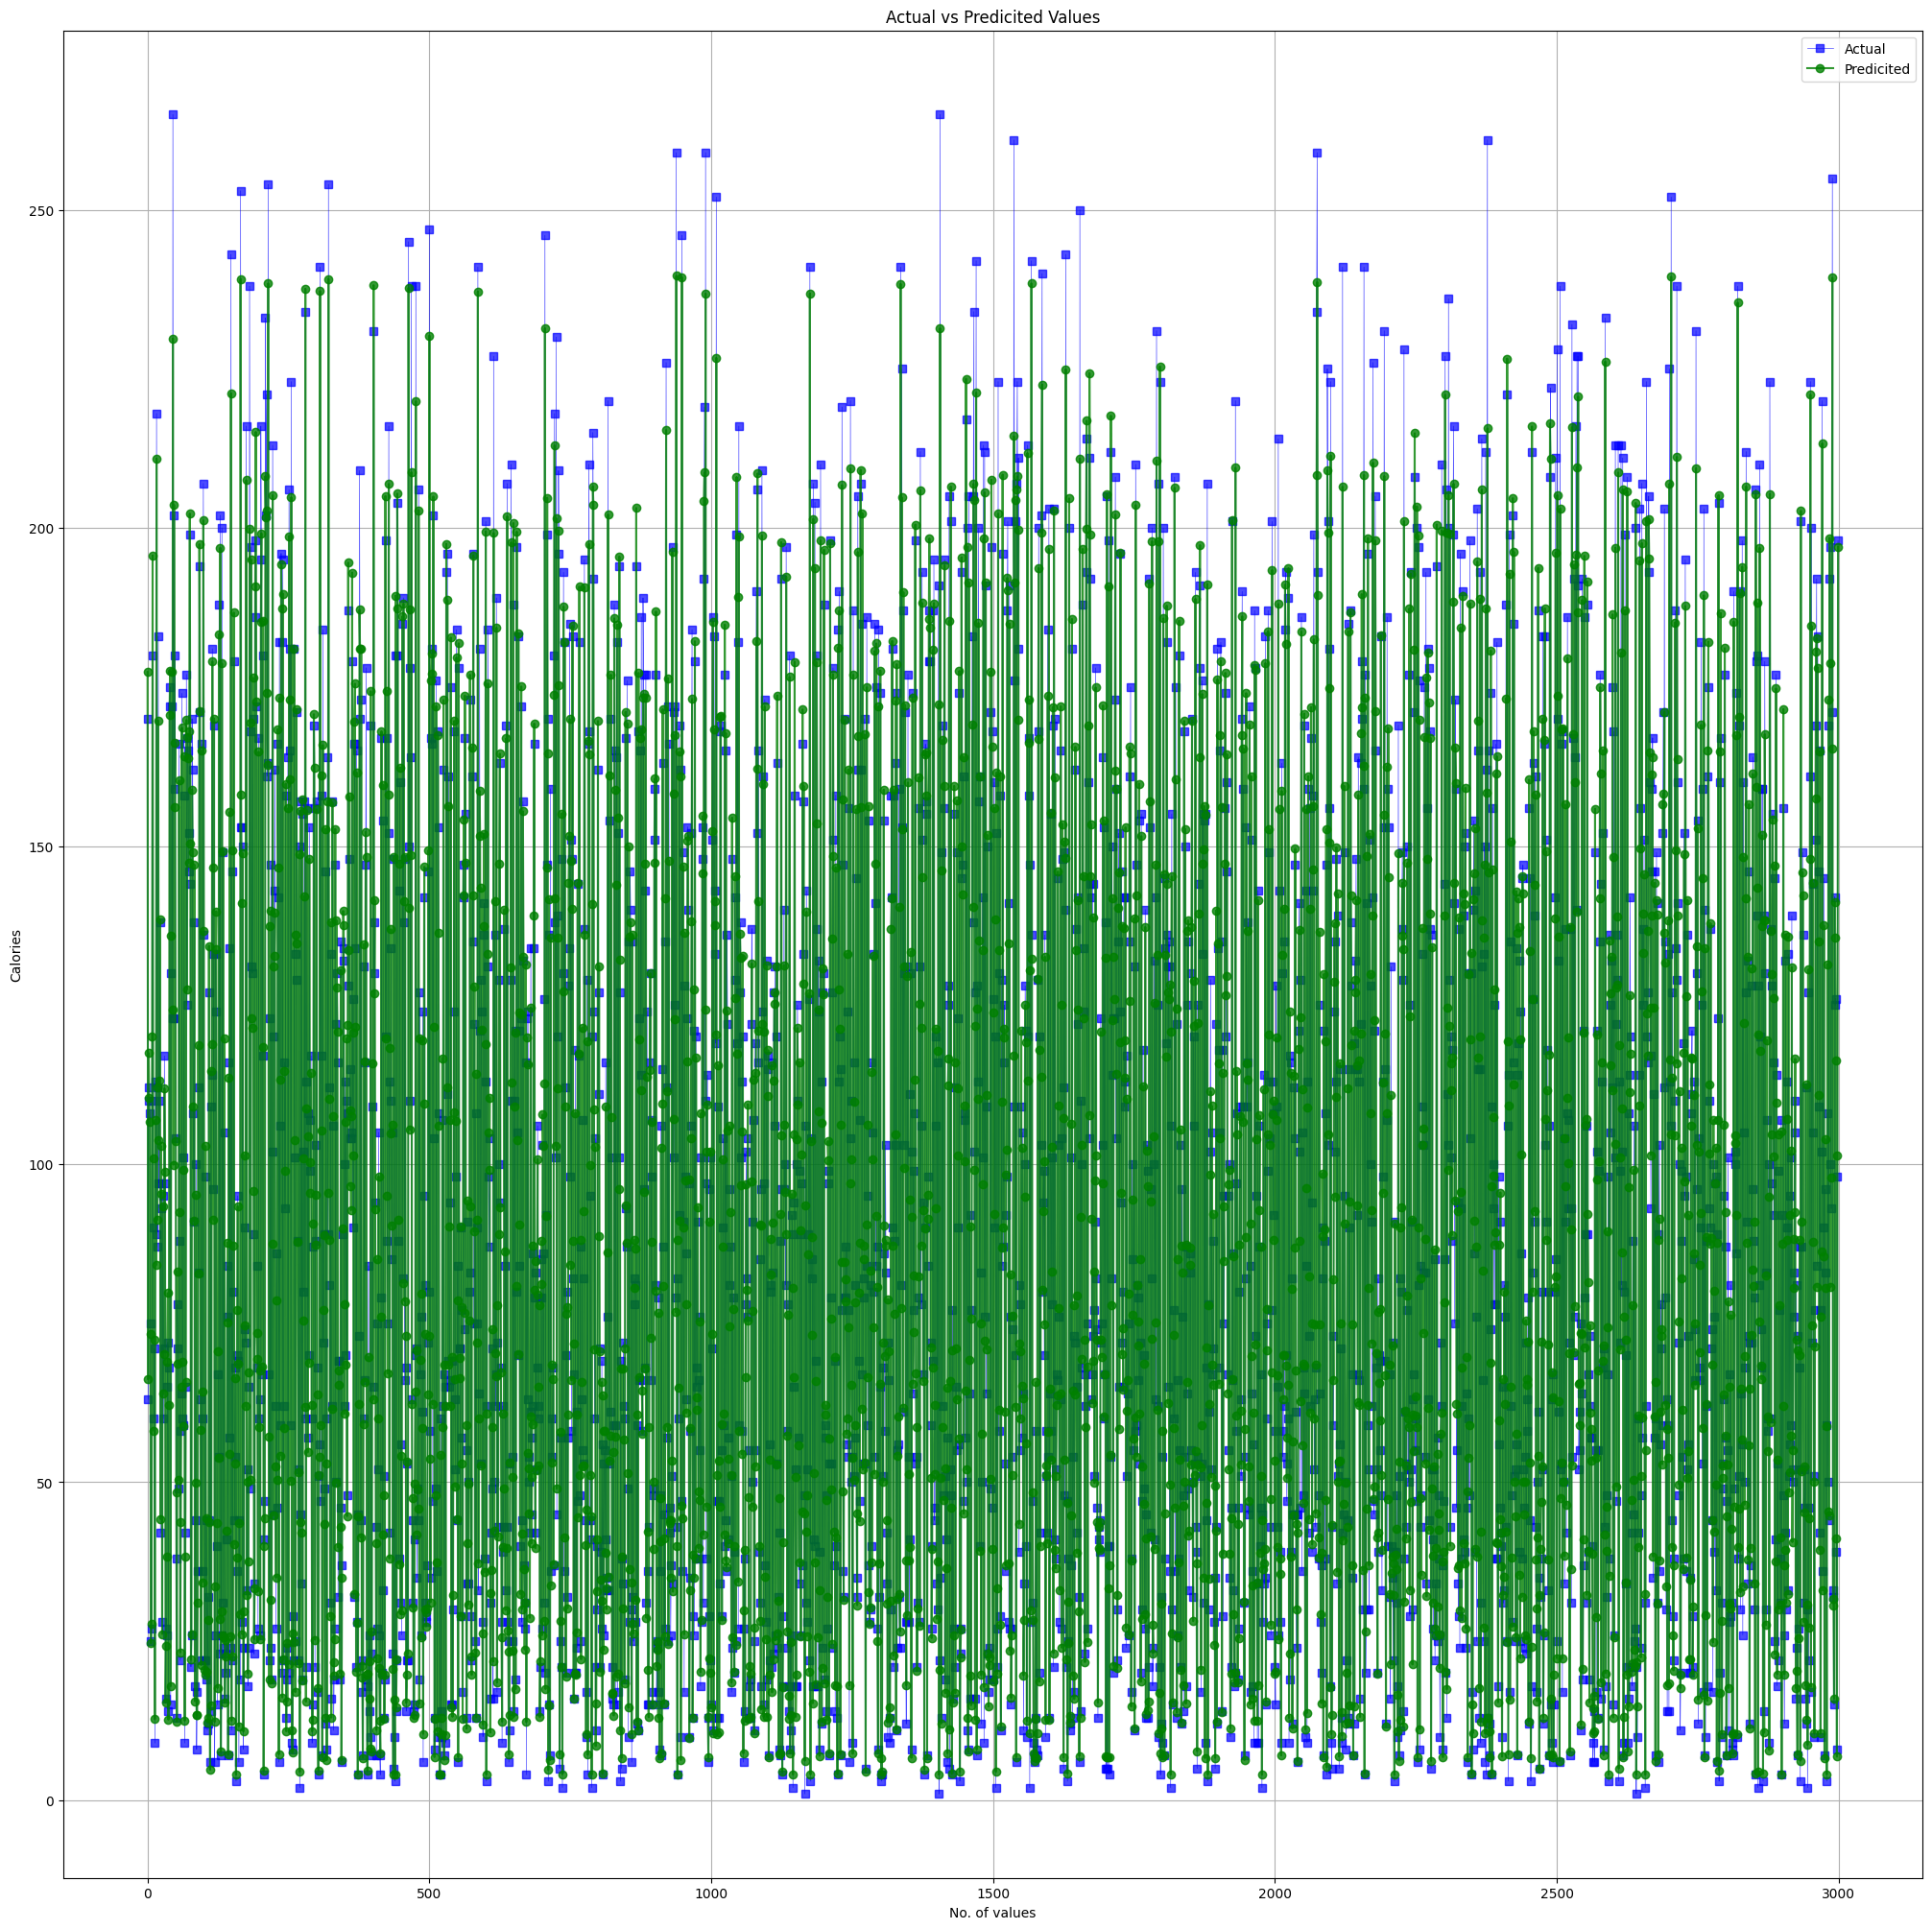

In [97]:
plt.figure(figsize=(25,25))
plt.plot(list(y_test), color='blue', marker='s', alpha=0.7, linewidth=0.5, label='Actual')
plt.plot(list(y_), color='green', marker='o', label='Predicited', alpha=0.8)
plt.xlabel('No. of values')
plt.ylabel('Calories')
plt.title('Actual vs Predicited Values')
plt.grid(True)
plt.legend()

## Learning Curve

In [100]:
train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train, cv=5, train_sizes=np.linspace(0.1,1.0,10))

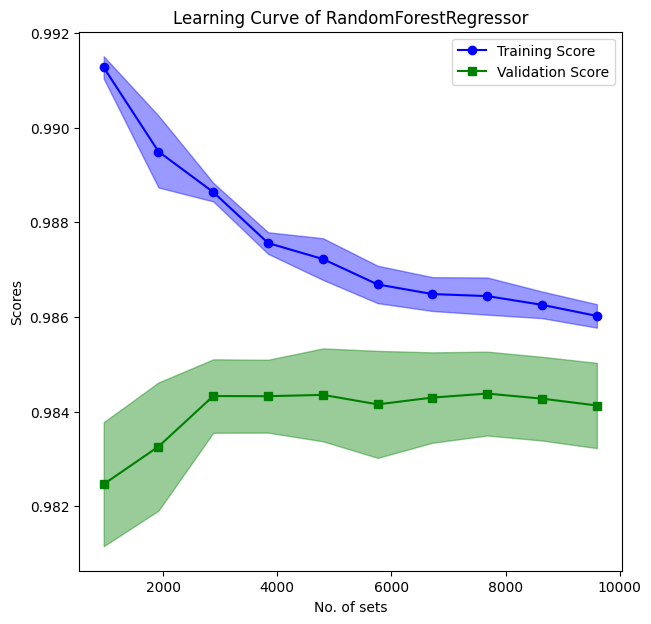

In [101]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(7,7))
plt.plot(train_sizes, train_scores_mean, color='blue', label='Training Score', marker='o')
plt.plot(train_sizes, val_scores_mean, color='green', label='Validation Score', marker='s')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.4)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.4)

plt.xlabel("No. of sets")
plt.ylabel("Scores")
plt.title("Learning Curve of RandomForestRegressor")
plt.legend(loc='best')

In [102]:
import pickle
with open('model.dat', 'wb') as file:
    pickle.dump(pipe, file)